In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel('/content/Untitled spreadsheet (1).xlsx')
df1.head()

,rating,text,text.1
0,5.0,Good quality light weight and price see a good...,"अच्छी गुणवत्ता, हल्के वजन और कीमत से अच्छा उत्..."
1,2.0,Not meet expectations,अपेक्षाओं पर खरा नहीं उतरना
2,5.0,The product compared to others in its category...,यह उत्पाद अपनी श्रेणी के अन्य उत्पादों की तुलन...
3,4.0,worth the cost,लागत के लायक
4,5.0,Niceee!!!,बहुत बढ़िया!!!


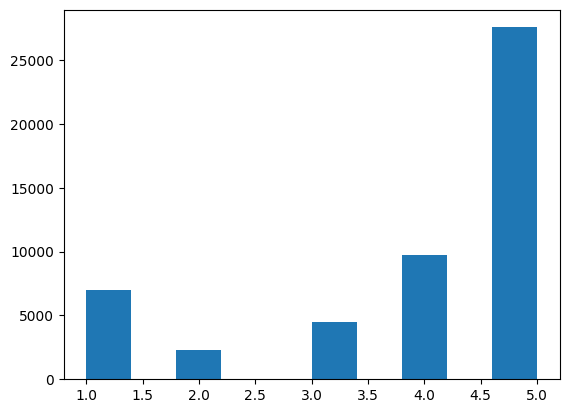

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df1['rating'])
plt.show()

In [ ]:
df1.isna().sum()

,0
rating,2
text,3
text.1,0


In [ ]:

df1.dropna(inplace=True)


In [ ]:
df1.isna().sum()

,0
rating,0
text,0
text.1,0


In [ ]:
# prompt: convert rating floating into intiger

df1['rating'] = df1['rating'].astype(int)

In [ ]:



df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51151 entries, 0 to 51151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  51151 non-null  int64 
 1   text    51151 non-null  object
 2   text.1  51151 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
df1

,rating,text,text.1
0,5,Good quality light weight and price see a good...,"अच्छी गुणवत्ता, हल्के वजन और कीमत से अच्छा उत्..."
1,2,Not meet expectations,अपेक्षाओं पर खरा नहीं उतरना
2,5,The product compared to others in its category...,यह उत्पाद अपनी श्रेणी के अन्य उत्पादों की तुलन...
3,4,worth the cost,लागत के लायक
4,5,Niceee!!!,बहुत बढ़िया!!!
...,...,...,...
51147,4,Good I am happy thanks filip cart,"अच्छा, मैं खुश हूं, धन्यवाद फ़िलिप कार्ट"
51148,5,Fit,उपयुक्त
51149,5,Awesome productGood designTruly dual band router,"बहुत बढ़िया उत्पाद, अच्छा डिज़ाइन, सचमुच डुअल ..."
51150,5,very nice product i give 5 star,"बहुत अच्छा उत्पाद, मैं 5 स्टार देता हूं"


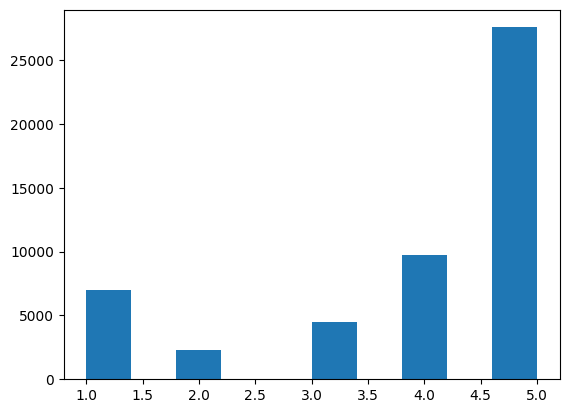

In [ ]:
plt.hist(df1['rating'])
plt.show()

In [ ]:
df1['sentiment'] = df1['rating'].apply(lambda x: 1 if x > 3 else (0 if x < 3 else 2))

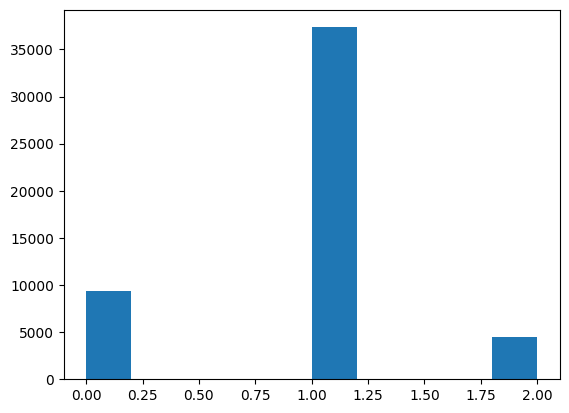

In [ ]:
plt.hist(df1['sentiment'])
plt.show()

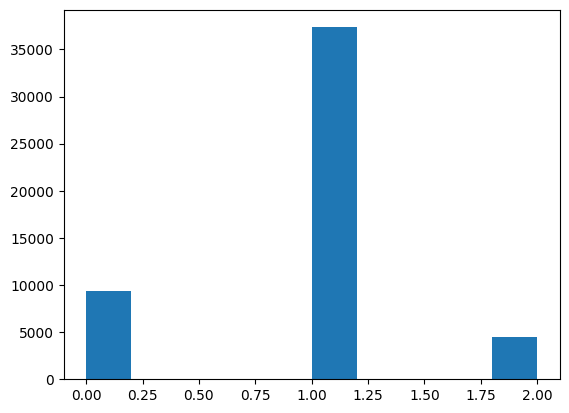

In [ ]:
plt.hist(df1['sentiment'])
plt.show()

In [ ]:
# prompt: drop text column

df1 = df1.drop('text', axis=1)
df1.head()

,rating,text.1,sentiment
0,5,"अच्छी गुणवत्ता, हल्के वजन और कीमत से अच्छा उत्...",1
1,2,अपेक्षाओं पर खरा नहीं उतरना,0
2,5,यह उत्पाद अपनी श्रेणी के अन्य उत्पादों की तुलन...,1
3,4,लागत के लायक,1
4,5,बहुत बढ़िया!!!,1


In [ ]:
df1.head(100)

,rating,text.1,sentiment
0,5,"अच्छी गुणवत्ता, हल्के वजन और कीमत से अच्छा उत्...",1
1,2,अपेक्षाओं पर खरा नहीं उतरना,0
2,5,यह उत्पाद अपनी श्रेणी के अन्य उत्पादों की तुलन...,1
3,4,लागत के लायक,1
4,5,बहुत बढ़िया!!!,1
...,...,...,...
95,5,"निर्माण गुणवत्ता अद्भुत है, इस मूल्य सीमा में ...",1
96,5,बहुत अच्छा साउंडबार... जोर से और गर्व से भारत ...,1
97,5,सुपर क़ुलाइट,1
98,5,1 दिन डेमो नहीं आया,1


In [ ]:
import pandas as pd
import re

data = df1
manual_hindi_stopwords = {
   "के", "का", "कि", "की", "है", "को", "पर", "यह", "से", "में", "और",
        "एक", "था", "जो", "तक", "ने", "हो", "हैं", "लिए", "कर", "दिया", "इस", "भी",
        "तो", "ही", "नहीं", "आप", "हम", "उन", "अगर", "या", "जब", "तक", "मुझे", "हमारे"
}

# Define a cleaning function
def clean_text(text):

    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove emojis and non-Hindi characters
    text = re.sub(r"[^\u0900-\u097F\s]", '', text)  # Keep only Hindi characters and spaces

    # Remove extra whitespace
    text = re.sub(r"\s+", ' ', text).strip()
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in manual_hindi_stopwords])
    return text
data = df1
# Apply the cleaning function to the 'content_hindi' column
data['cleaned_content'] = data['text.1'].apply(clean_text)

# Display the cleaned reviews
print(data[['text.1', 'cleaned_content']].head())



                                              text.1  \
0  अच्छी गुणवत्ता, हल्के वजन और कीमत से अच्छा उत्...   
1                        अपेक्षाओं पर खरा नहीं उतरना   
2  यह उत्पाद अपनी श्रेणी के अन्य उत्पादों की तुलन...   
3                                       लागत के लायक   
4                                     बहुत बढ़िया!!!   

                                     cleaned_content  
0             अचछ गणवतत हलक वजन कमत स अचछ उतपद दखत ह  
1                                   अपकषओ खर नह उतरन  
2  उतपद अपन शरण क अनय उतपद क तलन म ससत ह लकन परदर...  
3                                          लगत क लयक  
4                                            बहत बढय  


In [ ]:
!pip install indic-nlp-library

from indicnlp.tokenize import indic_tokenize

# Assuming 'data' DataFrame and 'cleaned_content' column exist as in the previous code.
data['tokenized_content'] = data['cleaned_content'].apply(lambda x: indic_tokenize.trivial_tokenize(x))
print(data[['cleaned_content', 'tokenized_content']].head())


                                     cleaned_content  \
0             अचछ गणवतत हलक वजन कमत स अचछ उतपद दखत ह   
1                                   अपकषओ खर नह उतरन   
2  उतपद अपन शरण क अनय उतपद क तलन म ससत ह लकन परदर...   
3                                          लगत क लयक   
4                                            बहत बढय   

                                   tokenized_content  
0  [अचछ, गणवतत, हलक, वजन, कमत, स, अचछ, उतपद, दखत, ह]  
1                              [अपकषओ, खर, नह, उतरन]  
2  [उतपद, अपन, शरण, क, अनय, उतपद, क, तलन, म, ससत,...  
3                                      [लगत, क, लयक]  
4                                         [बहत, बढय]  


In [ ]:
data

,rating,text.1,sentiment,cleaned_content,tokenized_content
0,5,"अच्छी गुणवत्ता, हल्के वजन और कीमत से अच्छा उत्...",1,अचछ गणवतत हलक वजन कमत स अचछ उतपद दखत ह,"[अचछ, गणवतत, हलक, वजन, कमत, स, अचछ, उतपद, दखत, ह]"
1,2,अपेक्षाओं पर खरा नहीं उतरना,0,अपकषओ खर नह उतरन,"[अपकषओ, खर, नह, उतरन]"
2,5,यह उत्पाद अपनी श्रेणी के अन्य उत्पादों की तुलन...,1,उतपद अपन शरण क अनय उतपद क तलन म ससत ह लकन परदर...,"[उतपद, अपन, शरण, क, अनय, उतपद, क, तलन, म, ससत,..."
3,4,लागत के लायक,1,लगत क लयक,"[लगत, क, लयक]"
4,5,बहुत बढ़िया!!!,1,बहत बढय,"[बहत, बढय]"
...,...,...,...,...,...
51147,4,"अच्छा, मैं खुश हूं, धन्यवाद फ़िलिप कार्ट",1,अचछ म खश ह धनयवद फलप करट,"[अचछ, म, खश, ह, धनयवद, फलप, करट]"
51148,5,उपयुक्त,1,उपयकत,[उपयकत]
51149,5,"बहुत बढ़िया उत्पाद, अच्छा डिज़ाइन, सचमुच डुअल ...",1,बहत बढय उतपद अचछ डजइन सचमच डअल बड रउटर,"[बहत, बढय, उतपद, अचछ, डजइन, सचमच, डअल, बड, रउटर]"
51150,5,"बहुत अच्छा उत्पाद, मैं 5 स्टार देता हूं",1,बहत अचछ उतपद म सटर दत ह,"[बहत, अचछ, उतपद, म, सटर, दत, ह]"


In [ ]:
# prompt: drop columns index,title,content_hindi,	rating

# Drop specified columns
columns_to_drop = ['text.1', 'rating','cleaned_content']
data= data.drop(columns=columns_to_drop, errors='ignore')

data

,sentiment,tokenized_content
0,1,"[अचछ, गणवतत, हलक, वजन, कमत, स, अचछ, उतपद, दखत, ह]"
1,0,"[अपकषओ, खर, नह, उतरन]"
2,1,"[उतपद, अपन, शरण, क, अनय, उतपद, क, तलन, म, ससत,..."
3,1,"[लगत, क, लयक]"
4,1,"[बहत, बढय]"
...,...,...
51147,1,"[अचछ, म, खश, ह, धनयवद, फलप, करट]"
51148,1,[उपयकत]
51149,1,"[बहत, बढय, उतपद, अचछ, डजइन, सचमच, डअल, बड, रउटर]"
51150,1,"[बहत, अचछ, उतपद, म, सटर, दत, ह]"


In [ ]:
# prompt: sample using smote and asign the data

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Assuming 'sentiment' is your target variable and other columns are features
# Instead of using tokenized_content directly, use the original cleaned_content for TF-IDF
# X = data['tokenized_content']  # This was the issue
y = data['sentiment']

# Join the tokens back into a string before passing to fit_transform
X = data['tokenized_content'].apply(' '.join) # Join the tokens in each row back into a single string

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, lowercase=False) # Disable lowercase conversion

# Fit and transform the cleaned text
X = tfidf.fit_transform(X) # Transform text data into numerical features using TF-IDF

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled and y_train_resampled contain the oversampled data
# Use these for training your model

# Example: Print the class distribution after SMOTE
from collections import Counter
print("Original dataset shape %s" % Counter(y_train))
print("Resampled dataset shape %s" % Counter(y_train_resampled))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Original dataset shape Counter({1: 29903, 0: 7426, 2: 3591})
Resampled dataset shape Counter({1: 29903, 0: 29903, 2: 29903})


In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# prompt: predict using xg boost

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report # Import classification_report

# Initialize and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42) # num_class should match the number of classes
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8165379728276806
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1898
           1       0.94      0.87      0.90      7442
           2       0.27      0.41      0.32       891

    accuracy                           0.82     10231
   macro avg       0.66      0.69      0.67     10231
weighted avg       0.85      0.82      0.83     10231



In [ ]:
# prompt: download vectorised pkl

from sklearn.metrics import classification_report
import joblib

# Assuming 'xgb_model' and 'tfidf' are defined as in your previous code

# pkle the trained XGBoost model
joblib.dump(xgb_model, 'xgb_model.pkl')

# pkle the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


print("Model and vectorizer pkled successfully.")

Model and vectorizer pkled successfully.


In [ ]:
# prompt: sample predict negative positive nuetral

import pickle

# Load the saved model and vectorizer
filename = 'xgb_model.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'

loaded_model = joblib.load(filename)  # Load with joblib
loaded_vectorizer = joblib.load(vectorizer_filename)  # Load with joblib

# ... (rest of your code)

# Example new text for prediction (replace with your actual text)
new_text = ["कपड़ा चित्र में दिखाए अनुसार नहीं है, यह बहुत ही निम्न गुणवत्ता वाली सामग्री से बना है"]
  # Example positive review

# Preprocess the new text (same steps as during training)
# ... (clean_text function from your previous code)
manual_hindi_stopwords = {
    "के", "का", "कि", "की", "है", "को", "पर", "यह", "से", "में", "और",
    "एक", "था", "जो", "तक", "ने", "हो", "हैं", "लिए", "कर", "दिया", "इस", "भी",
    "तो", "ही", "नहीं", "आप", "हम", "उन", "अगर", "या", "जब", "तक", "मुझे", "हमारे"
}

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r"[^\u0900-\u097F\s]", '', text)
    text = re.sub(r"\s+", ' ', text).strip()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in manual_hindi_stopwords])
    return text


cleaned_text = [clean_text(text) for text in new_text]
tokenized_text = [indic_tokenize.trivial_tokenize(text) for text in cleaned_text]

# Join tokens back into strings
joined_tokens = [' '.join(tokens) for tokens in tokenized_text]


# Transform the new text using the loaded vectorizer
new_text_vec = loaded_vectorizer.transform(joined_tokens)

# Predict the sentiment
prediction = loaded_model.predict(new_text_vec)


# Print the prediction (0: Negative, 1: Positive, 2: Neutral)
print(prediction)

sentiment_labels = {0: "Negative", 1: "Positive", 2: "Neutral"}
# Assign the predicted sentiment labels to the predicted_sentiments variable
predicted_sentiments = [sentiment_labels[p] for p in prediction] # Corrected this line
print(predicted_sentiments) # print predicted sentiment

[0]
['Negative']
